In [1]:
import pandas as pd 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
import seaborn as sns

In [162]:
df = pd.read_csv(r"C:\Users\Beyond\PycharmProjects\file_loader\recom-day-2020-challenge\home_ex_raw_data\home_ex_raw_data.csv")

We can get rid of the columns named 'serial_number','Unnamed: 0' - they don't provide any learnable information

In [4]:
df = df.drop(columns=['serial_number','Unnamed: 0'])

Judging by the naked eye it seems like there is some redundancy in the data - lets check if there are some duplicated columns

In [5]:
df.head()

,test_#_0,test_#_1,test_#_2,test_#_3,test_#_4,test_#_5,test_#_6,test_#_7,test_#_8,test_#_9,test_#_10,test_#_11,test_#_12,test_#_13,test_#_14,test_#_15,test_#_16,test_#_17,test_#_18,test_#_19,test_#_20,test_#_21,test_#_22,test_#_23,test_#_24,test_#_25,test_#_26,test_#_27,test_#_28,test_#_29,test_#_30,test_#_31,test_#_32,test_#_33,test_#_34,test_#_35,test_#_36,test_#_37,test_#_38,test_#_39,test_#_40,test_#_41,test_#_42,test_#_43,test_#_44,test_#_45,test_#_46,test_#_47,test_#_48,test_#_49,test_#_50,test_#_51,test_#_52,test_#_53,test_#_54,test_#_55,test_#_56,test_#_57,test_#_58,test_#_59,test_#_60,test_#_61,test_#_62,test_#_63,test_#_64,test_#_65,test_#_66,test_#_67,test_#_68,test_#_69,test_#_70,test_#_71,test_#_72,test_#_73,test_#_74,test_#_75,test_#_76,test_#_77,test_#_78,test_#_79,test_#_80,test_#_81,test_#_82,test_#_83,test_#_84,test_#_85,test_#_86,test_#_87,test_#_88,test_#_89,test_#_90,test_#_91,test_#_92,test_#_93,test_#_94,test_#_95,test_#_96,test_#_97,test_#_98,test_#_99,test_#_100,test_#_101,test_#_102,test_#_103,test_#_104,test_#_105,test_#_106,test_#_107,test_#_108,test_#_109,test_#_110,test_#_111,test_#_112,test_#_113,test_#_114,test_#_115,test_#_116,test_#_117,test_#_118,test_#_119,test_#_120,test_#_121,test_#_122,test_#_123,test_#_124,test_#_125,test_#_126,test_#_127,test_#_128,test_#_129,test_#_130,test_#_131,test_#_132,test_#_133,test_#_134,test_#_135,test_#_136,test_#_137,test_#_138,test_#_139,test_#_140,test_#_141,test_#_142,test_#_143,test_#_144,test_#_145,test_#_146,test_#_147,test_#_148,test_#_149,test_#_150,test_#_151,test_#_152,test_#_153,test_#_154,test_#_155,test_#_156,test_#_157,test_#_158,test_#_159,test_#_160,test_#_161,test_#_162,test_#_163,test_#_164,test_#_165,test_#_166,test_#_167,test_#_168,test_#_169,test_#_170,test_#_171,test_#_172,test_#_173,test_#_174,test_#_175,test_#_176,test_#_177,test_#_178,test_#_179,test_#_180,test_#_181,test_#_182,test_#_183,test_#_184,test_#_185,test_#_186,test_#_187,test_#_188,test_#_189,test_#_190,test_#_191,test_#_192,test_#_193,test_#_194,test_#_195,test_#_196,test_#_197,test_#_198,test_#_199,test_#_200,test_#_201,test_#_202,test_#_203,test_#_204,test_#_205,test_#_206,test_#_207,test_#_208,test_#_209,test_#_210,test_#_211,test_#_212,test_#_213,test_#_214,test_#_215,test_#_216,test_#_217,test_#_218,test_#_219,test_#_220,test_#_221,test_#_222,test_#_223,test_#_224,test_#_225,test_#_226,test_#_227,test_#_228,test_#_229,test_#_230,test_#_231,test_#_232,test_#_233,test_#_234,test_#_235,test_#_236,test_#_237,test_#_238,test_#_239,test_#_240,test_#_241,test_#_242,test_#_243,test_#_244,test_#_245,test_#_246,test_#_247,test_#_248,test_#_249,...,test_#_1314,test_#_1315,test_#_1316,test_#_1317,test_#_1318,test_#_1319,test_#_1320,test_#_1321,test_#_1322,test_#_1323,test_#_1324,test_#_1325,test_#_1326,test_#_1327,test_#_1328,test_#_1329,test_#_1330,test_#_1331,test_#_1332,test_#_1333,test_#_1334,test_#_1335,test_#_1336,test_#_1337,test_#_1338,test_#_1339,test_#_1340,test_#_1341,test_#_1342,test_#_1343,test_#_1344,test_#_1345,test_#_1346,test_#_1347,test_#_1348,test_#_1349,test_#_1350,test_#_1351,test_#_1352,test_#_1353,test_#_1354,test_#_1355,test_#_1356,test_#_1357,test_#_1358,test_#_1359,test_#_1360,test_#_1361,test_#_1362,test_#_1363,test_#_1364,test_#_1365,test_#_1366,test_#_1367,test_#_1368,test_#_1369,test_#_1370,test_#_1371,test_#_1372,test_#_1373,test_#_1374,test_#_1375,test_#_1376,test_#_1377,test_#_1378,test_#_1379,test_#_1380,test_#_1381,test_#_1382,test_#_1383,test_#_1384,test_#_1385,test_#_1386,test_#_1387,test_#_1388,test_#_1389,test_#_1390,test_#_1391,test_#_1392,test_#_1393,test_#_1394,test_#_1395,test_#_1396,test_#_1397,test_#_1398,test_#_1399,test_#_1400,test_#_1401,test_#_1402,test_#_1403,test_#_1404,test_#_1405,test_#_1406,test_#_1407,test_#_1408,test_#_1409,test_#_1410,test_#_1411,test_#_1412,test_#_1413,test_#_1414,test_#_1415,test_#_1416,test_#_1417,test_#_1418,test_#_1419,test_#_1420,test_#_1421,test_#_1422,test_#_1423,test_#_1424,test_#_1425,test_#_1426

Transposing and transposing back will take some time but eliminates 300 columns

In [6]:
df1 = df.T.drop_duplicates().T

At this point I'd like to get a base line of the raw data with no more preprocessing

In [7]:
X_train_bl, X_test_bl, y_train, y_test = train_test_split(
     df1.iloc[:,0:-1], df1.iloc[:,-1], test_size=0.33, random_state=42)

We can see that we don't get significant and usable understanding further than the distributions layed out in the True category and the precision in the False category matches the datasets distributions. In farther modles we will try to get better results on the True category or improve the recall on the False category
One of the reasons I chose to use LGBM is because its ability to deal with Nan values by selecting values that helps the accuracy the most.
The other reason is the LGBM's ability to get the feature importance 

In [8]:
lgbm_bl = LGBMClassifier(objective='multiclass',class_weight='balanced', random_state=42)
lgbm_bl.fit(X_train_bl.astype('float'), y_train, verbose=1)
y_pred = lgbm_bl.predict(X_test_bl.astype('float'))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           ?       0.10      0.29      0.15      2560
       False       0.89      0.67      0.77     22598
        True       0.01      0.06      0.02       151
   not found       0.02      0.03      0.02       156

    accuracy                           0.63     25465
   macro avg       0.26      0.26      0.24     25465
weighted avg       0.80      0.63      0.70     25465

[[  749  1701    73    37]
 [ 6561 15236   553   248]
 [   42    98     9     2]
 [   52    98     1     5]]


We'd like to explore the results distribution - it is a sort of a baseline - knowing how "good" could a random guess get 

In [65]:
y_train.value_counts()/y_train.shape[0]

False        0.887855
?            0.099766
True         0.006808
not found    0.005570
Name: Diagnosis, dtype: float64

Trying to identify a virus means we'd better have good results on the True category - lets see if there are features we could learn from the dataset characteristics

In [69]:
df_true = X_train_bl[y_train=='True']

It seems like some of the tests # has almost a unique value for each "true" case - which makes it very difficult to gain an understanding of 

In [70]:
df_true.describe()

,test_#_0,test_#_1,test_#_2,test_#_3,test_#_4,test_#_5,test_#_6,test_#_7,test_#_10,test_#_11,test_#_12,test_#_13,test_#_14,test_#_16,test_#_17,test_#_18,test_#_19,test_#_20,test_#_21,test_#_22,test_#_25,test_#_26,test_#_27,test_#_28,test_#_30,test_#_31,test_#_32,test_#_33,test_#_34,test_#_35,test_#_36,test_#_39,test_#_40,test_#_41,test_#_43,test_#_44,test_#_45,test_#_46,test_#_47,test_#_48,test_#_49,test_#_52,test_#_53,test_#_54,test_#_55,test_#_56,test_#_58,test_#_59,test_#_60,test_#_61,test_#_62,test_#_63,test_#_64,test_#_67,test_#_68,test_#_69,test_#_70,test_#_71,test_#_73,test_#_74,test_#_75,test_#_76,test_#_77,test_#_78,test_#_79,test_#_82,test_#_83,test_#_84,test_#_85,test_#_86,test_#_88,test_#_89,test_#_90,test_#_91,test_#_92,test_#_93,test_#_94,test_#_97,test_#_98,test_#_100,test_#_101,test_#_103,test_#_104,test_#_105,test_#_106,test_#_107,test_#_108,test_#_109,test_#_112,test_#_113,test_#_114,test_#_116,test_#_117,test_#_118,test_#_119,test_#_120,test_#_121,test_#_122,test_#_125,test_#_126,test_#_127,test_#_128,test_#_129,test_#_130,test_#_131,test_#_133,test_#_134,test_#_135,test_#_136,test_#_137,test_#_138,test_#_139,test_#_142,test_#_143,test_#_144,test_#_145,test_#_146,test_#_147,test_#_148,test_#_150,test_#_151,test_#_152,test_#_153,test_#_154,test_#_155,test_#_156,test_#_159,test_#_160,test_#_161,test_#_162,test_#_163,test_#_165,test_#_166,test_#_167,test_#_168,test_#_169,test_#_170,test_#_171,test_#_174,test_#_175,test_#_176,test_#_177,test_#_178,test_#_180,test_#_181,test_#_182,test_#_183,test_#_184,test_#_185,test_#_186,test_#_189,test_#_190,test_#_191,test_#_192,test_#_193,test_#_195,test_#_196,test_#_197,test_#_198,test_#_199,test_#_200,test_#_201,test_#_204,test_#_205,test_#_206,test_#_207,test_#_208,test_#_210,test_#_211,test_#_212,test_#_213,test_#_214,test_#_215,test_#_216,test_#_219,test_#_220,test_#_221,test_#_222,test_#_223,test_#_225,test_#_226,test_#_227,test_#_228,test_#_229,test_#_230,test_#_231,test_#_234,test_#_235,test_#_236,test_#_238,test_#_239,test_#_240,test_#_241,test_#_242,test_#_243,test_#_244,test_#_247,test_#_248,test_#_249,test_#_250,test_#_252,test_#_253,test_#_254,test_#_255,test_#_256,test_#_257,test_#_258,test_#_261,test_#_262,test_#_264,test_#_265,test_#_267,test_#_268,test_#_269,test_#_270,test_#_271,test_#_272,test_#_275,test_#_276,test_#_277,test_#_278,test_#_279,test_#_281,test_#_282,test_#_283,test_#_284,test_#_285,test_#_286,test_#_289,test_#_290,test_#_291,test_#_293,test_#_294,test_#_295,test_#_296,test_#_297,test_#_298,test_#_301,test_#_302,test_#_303,test_#_304,test_#_305,test_#_306,test_#_307,test_#_309,test_#_310,test_#_311,test_#_312,test_#_313,test_#_314,...,test_#_1250,test_#_1251,test_#_1254,test_#_1255,test_#_1256,test_#_1257,test_#_1258,test_#_1259,test_#_1260,test_#_1261,test_#_1263,test_#_1264,test_#_1265,test_#_1266,test_#_1267,test_#_1268,test_#_1271,test_#_1272,test_#_1273,test_#_1274,test_#_1276,test_#_1277,test_#_1278,test_#_1279,test_#_1280,test_#_1281,test_#_1284,test_#_1285,test_#_1286,test_#_1287,test_#_1288,test_#_1289,test_#_1291,test_#_1292,test_#_1293,test_#_1294,test_#_1295,test_#_1296,test_#_1299,test_#_1300,test_#_1301,test_#_1302,test_#_1303,test_#_1304,test_#_1306,test_#_1307,test_#_1308,test_#_1309,test_#_1310,test_#_1311,test_#_1314,test_#_1315,test_#_1316,test_#_1317,test_#_1318,test_#_1319,test_#_1321,test_#_1322,test_#_1323,test_#_1324,test_#_1325,test_#_1326,test_#_1329,test_#_1330,test_#_1331,test_#_1332,test_#_1333,test_#_1334,test_#_1336,test_#_1337,test_#_1338,test_#_1339,test_#_1340,test_#_1341,test_#_1344,test_#_1345,test_#_1346,test_#_1347,test_#_1348,test_#_1349,test_#_1351,test_#_1352,test_#_1353,test_#_1354,test_#_1355,test_#_1356,test_#_1359,test_#_1360,test_#_1361,test_#_1362,test_#_1363,test_#_1364,test_#_1366,test_#_1367,test_#_1368,test_#_1369,test_#_1370,test_#_1371,test_#_1374,test_#_1375,test_#_1376,test_#_1377,test_#_1378,test_#_1379,test_#_1381,test_#_1382,test_#_1383,test_#_1384,test_#_1385,test_#_1386,test_#_1389,

For each of the 1300 columns we can see the number of unique values - the upper side of the histogram means that each True value has a different number - that makes it difficult to learn the characteristics of the True cases

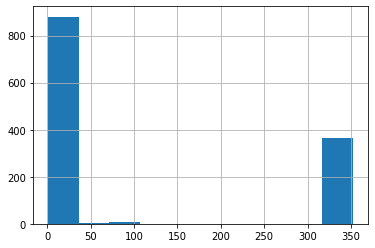

In [71]:
df_true.nunique().hist()

Let's take a single case to check if the True values for that case are somehow distributed together - we see that around 4000 we have most of the results but otherwise we have no significant result

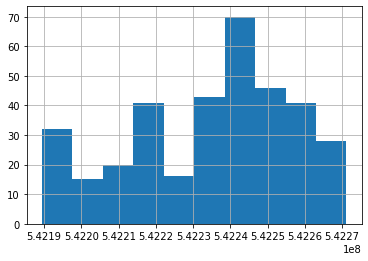

In [72]:
df_true['test_#_12'].hist()

If we'll take the under 10 unique values per column we could get a better chance to describe the values of the True test cases as we cover around 70% of the columns

presentege of values below 10 unique values:  69.9523052464229


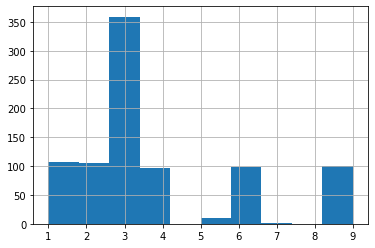

In [140]:
print('presentege of values below 10 unique values: ',100*sum(df_true.nunique()<10)/df_true.shape[1])

int_df_true.loc[:,int_df_true.nunique()<10].nunique().hist()

In [149]:
df_70_pesent_train=X_train_bl.loc[:, (X_train_bl.nunique() <= 9) |  (X_train_bl.nunique() >= 1)]#.dropna(axis=1)
X_test_new = X_test_bl[(X_test_bl.columns) & (df_70_pesent_train.columns)]

We don't get any improvment from slicing the data to the lower 70% 

In [150]:
lgbm_bl = LGBMClassifier(objective='multiclass',class_weight='balanced', random_state=42)
lgbm_bl.fit(df_70_pesent_train.astype('float'), y_train, verbose=1)
y_pred = lgbm_bl.predict(X_test_new.astype('float'))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           ?       0.10      0.29      0.15      2560
       False       0.89      0.67      0.77     22598
        True       0.01      0.06      0.02       151
   not found       0.02      0.03      0.02       156

    accuracy                           0.63     25465
   macro avg       0.26      0.26      0.24     25465
weighted avg       0.80      0.63      0.70     25465

[[  749  1701    73    37]
 [ 6561 15236   553   248]
 [   42    98     9     2]
 [   52    98     1     5]]


The fact that we are using 30% less test and we still get the same results gives a clue that some of the columns are redundant - so we could try tossing away some data. We are dropping Nan values and using ComplementNB based on Naive base - it is designed to deal with imbalanced data

In [153]:
df_70_pesent_train_nonan=df_70_pesent_train.dropna(axis=1)
X_test_new_nonan = X_test_new[(X_test_new.columns) & (df_70_pesent_train_nonan.columns)]
gnb = ComplementNB()

y_pred = gnb.fit(df_70_pesent_train_nonan, y_train).predict(X_test_new_nonan)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred,))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           ?       0.08      0.00      0.00      2560
       False       0.89      0.51      0.65     22598
        True       0.01      0.66      0.02       151
   not found       0.00      0.00      0.00       156

    accuracy                           0.46     25465
   macro avg       0.24      0.29      0.17     25465
weighted avg       0.80      0.46      0.58     25465

[[    1  1282  1277     0]
 [   12 11517 11069     0]
 [    0    51   100     0]
 [    0    94    62     0]]


On the personal level I think that the precision value is too low on both True and False categories - because it is around the original False distribution values in the data. It seems like the model doesn't get the real values of the data charateristics precision-wise - which means that on the True values we will get False positives almost for any value. On the upper side we got the recall higher then the baseline by 60% which means that we get 2/3 of the real infected individuals but the down side is, that we lost almost 20% on the False recall category. That means that half of the False results are not infected, and yet dealing with an epidemic such as COVID-19, we'd better be safe than sorry. It should be noted that the common practice of testing for Covid-19 is a double test with a gap of several days from one test to the other.

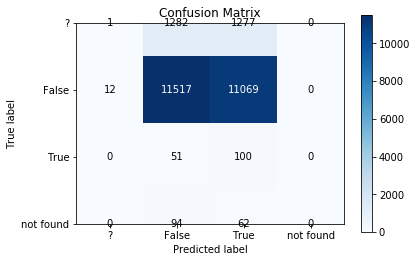

In [154]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)